# Importing all the necessary libraries

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Data cleaning

In [240]:
#let's read the dataset
df = pd.read_csv(r'C:\Users\LENOVO\Downloads\Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [241]:
#Converting the data from percentage to numerical or absolute form 
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [242]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [243]:

#Checking for missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [244]:
#Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [245]:
#Finding if there are outliers
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [246]:
df1=df

In [247]:
df1.head

<bound method NDFrame.head of                  country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp 

### Removing outliers

In [248]:
# removing outliers in imports
Q1 = df1.imports.quantile(0.05)
Q3 = df1.imports.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.imports >= Q1 - 1.5*IQR) & (df1.imports <= Q3 + 1.5*IQR)]

# removing outliers in child_mort
Q1 = df1.child_mort.quantile(0.05)
Q3 = df1.child_mort.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.child_mort >= Q1 - 1.5*IQR) & (df1.child_mort <= Q3 + 1.5*IQR)]

# removing outliers in health
Q1 = df1.health.quantile(0.05)
Q3 = df1.health.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.health >= Q1 - 1.5*IQR) & (df1.health <= Q3 + 1.5*IQR)]

# removing outliers in exports
Q1 = df1.exports.quantile(0.05)
Q3 = df1.exports.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.exports >= Q1 - 1.5*IQR) & (df1.exports <= Q3 + 1.5*IQR)]

# removing outliers in inflation
Q1 = df1.inflation.quantile(0.05)
Q3 = df1.inflation.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.inflation >= Q1 - 1.5*IQR) & (df1.inflation <= Q3 + 1.5*IQR)]

# removing outliers income
Q1 = df1.income.quantile(0.05)
Q3 = df1.income.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.income >= Q1 - 1.5*IQR) & (df1.income <= Q3 + 1.5*IQR)]

# removing outliers in gdpp
Q1 = df1.gdpp.quantile(0.05)
Q3 = df1.gdpp.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.gdpp >= Q1 - 1.5*IQR) & (df1.gdpp <= Q3 + 1.5*IQR)]

# removing outliers in life_expec
Q1 = df1.life_expec.quantile(0.05)
Q3 = df1.life_expec.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.life_expec >= Q1 - 1.5*IQR) & (df1.life_expec <= Q3 + 1.5*IQR)]

# removing outliers in total_fer
Q1 = df1.total_fer.quantile(0.05)
Q3 = df1.total_fer.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.total_fer >= Q1 - 1.5*IQR) & (df1.total_fer <= Q3 + 1.5*IQR)]



In [249]:
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [250]:
df1.shape

(163, 10)

# Data Preparation

In [251]:
#checking correlation between variables

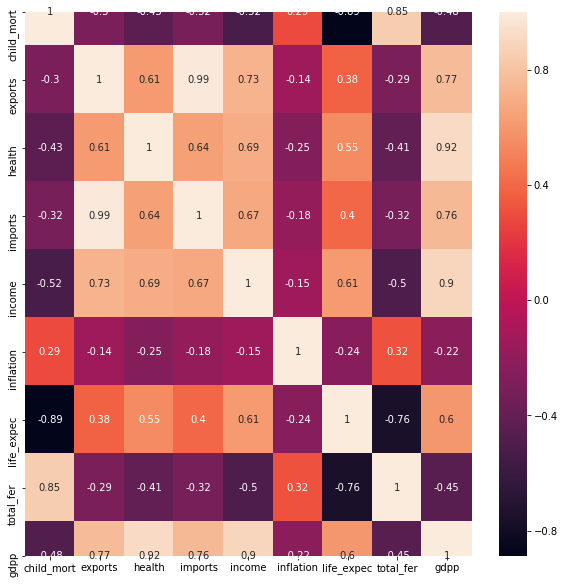

In [252]:
plt.figure(figsize = (10,10))        
sns.heatmap(df.corr(),annot = True)

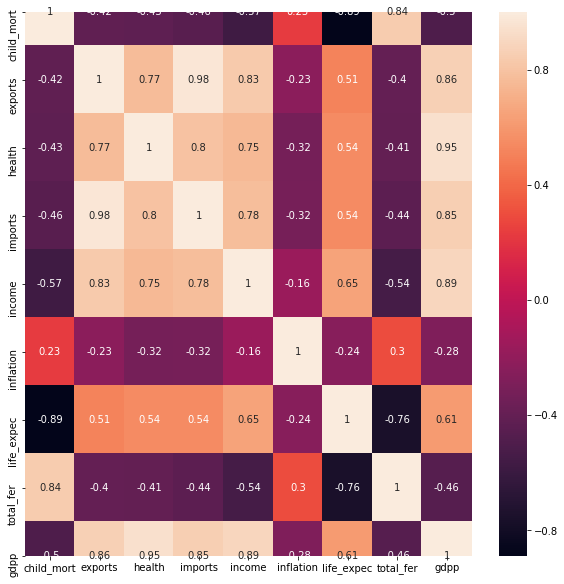

In [253]:
plt.figure(figsize = (10,10))        
sns.heatmap(df1.corr(),annot = True)

In [254]:
#the data is highly correlated hence we can use pca

In [255]:
#Now the  country column wont be included in our analysis in order to perform pca calculations,later we will add it to pc data

In [256]:
df2=df1.drop(['country'],axis=1)
df2.head() 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [257]:
#scaling and array conversion
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df3 = standard_scaler.fit_transform(df2)

In [258]:
df3

array([[ 1.30346558, -0.61761722, -0.5620229 , ..., -1.61238099,
         1.91131511, -0.70245521],
       [-0.54578122, -0.49689676, -0.43120409, ...,  0.66638867,
        -0.87033099, -0.48361951],
       [-0.27693692, -0.43404548, -0.47862366, ...,  0.689063  ,
        -0.04317483, -0.46072745],
       ...,
       [-0.37743946, -0.51927086, -0.53441704, ...,  0.30359947,
        -0.67021256, -0.6556193 ],
       [ 0.45170652, -0.58021259, -0.54700584, ..., -0.33128163,
         1.14419449, -0.6556193 ],
       [ 1.12507357, -0.5639083 , -0.53650688, ..., -2.08854181,
         1.63114932, -0.64633873]])

## applying pca 

In [259]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [260]:
pca.fit(df3)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

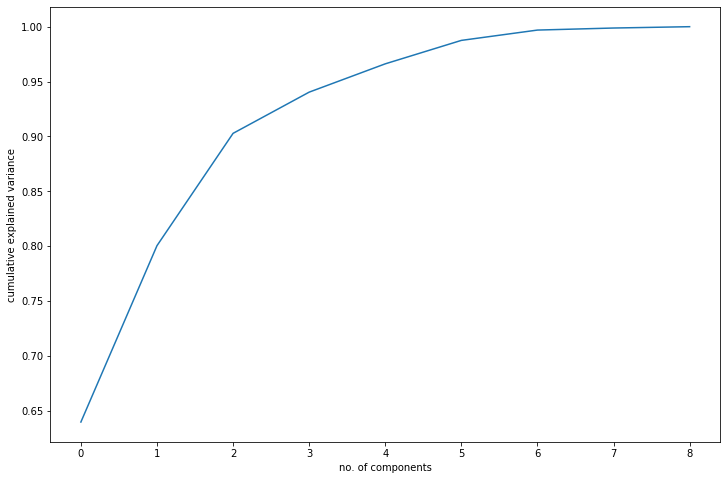

In [261]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no. of components')
plt.ylabel('cumulative explained variance')
plt.show()

4 PCs can explain more than 95%of the data ,hence taking four compponents

In [262]:
pca.components_

array([[-0.30698428,  0.36360862,  0.35765024,  0.36956682,  0.37409574,
        -0.15167333,  0.33453424, -0.29199051,  0.38591716],
       [ 0.51615625,  0.31577145,  0.26181863,  0.27417341,  0.12071875,
         0.0755424 , -0.39447983,  0.50457263,  0.24426115],
       [-0.11002365,  0.06608226, -0.06888596, -0.03445985,  0.20413194,
         0.96056568,  0.11005041,  0.0028528 ,  0.03346145],
       [ 0.02242295, -0.49457432,  0.59468911, -0.46835452,  0.03495056,
         0.02383563,  0.16087345,  0.17651624,  0.35079116],
       [ 0.22424908, -0.09605826,  0.05175913, -0.1778861 ,  0.2987636 ,
         0.03137184, -0.58328247, -0.68187063,  0.10369577],
       [ 0.05240946, -0.02328102, -0.43013634, -0.29937657,  0.76091377,
        -0.21241085,  0.12953054,  0.28334395,  0.02995917],
       [ 0.75727112, -0.00187263, -0.05090905,  0.03359657, -0.04993945,
         0.03081609,  0.57982829, -0.28572785, -0.03913646],
       [ 0.01119169, -0.1093388 ,  0.46880607,  0.16126166,  0

In [263]:
colnames = list(df2.columns)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [264]:
#checking pca components
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.306984,0.516156,-0.110024,0.022423
1,exports,0.363609,0.315771,0.066082,-0.494574
2,health,0.357650,0.261819,-0.068886,0.594689
3,imports,0.369567,0.274173,-0.034460,-0.468355
4,income,0.374096,0.120719,0.204132,0.034951
5,inflation,-0.151673,0.075542,0.960566,0.023836
6,life_expec,0.334534,-0.394480,0.110050,0.160873
7,total_fer,-0.291991,0.504573,0.002853,0.176516
8,gdpp,0.385917,0.244261,0.033461,0.350791


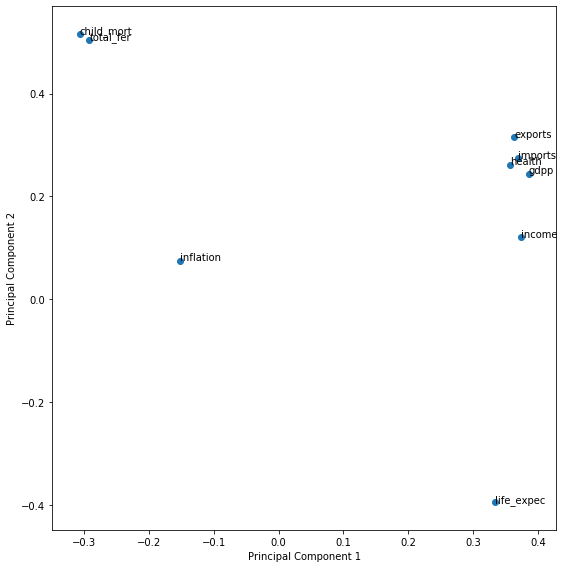

In [265]:
#  visualising how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

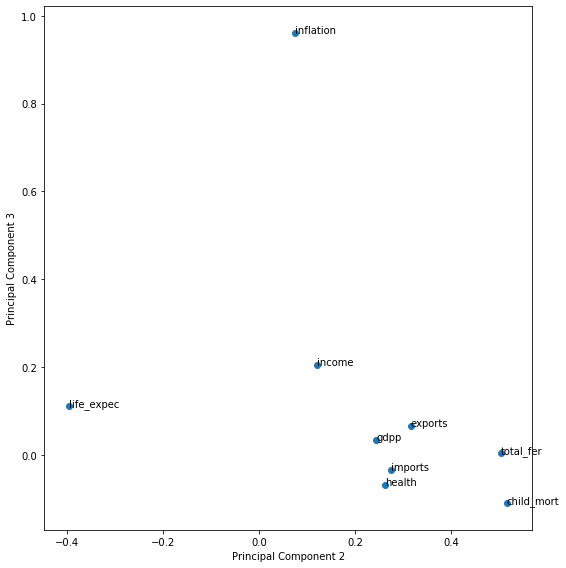

In [266]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC2, pcs_df.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC2[i],pcs_df.PC3[i]))
plt.tight_layout()
plt.show()

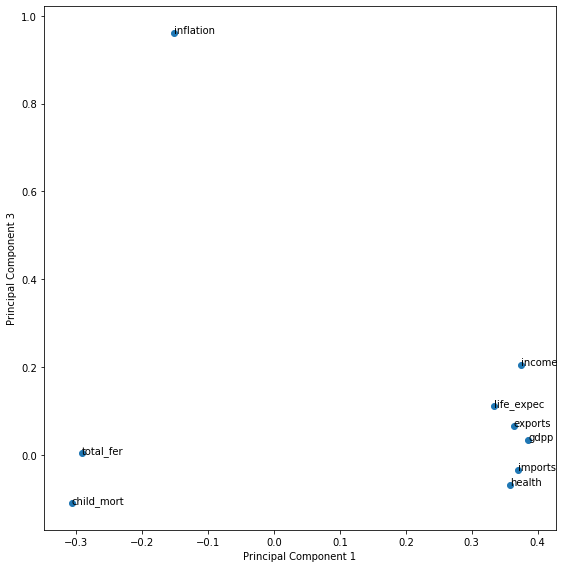

In [267]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC3[i]))
plt.tight_layout()
plt.show()

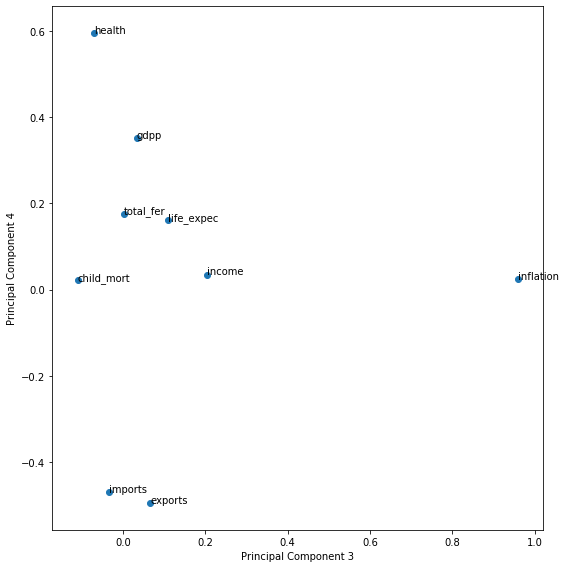

In [268]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC3, pcs_df.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC3[i],pcs_df.PC4[i]))
plt.tight_layout()
plt.show()

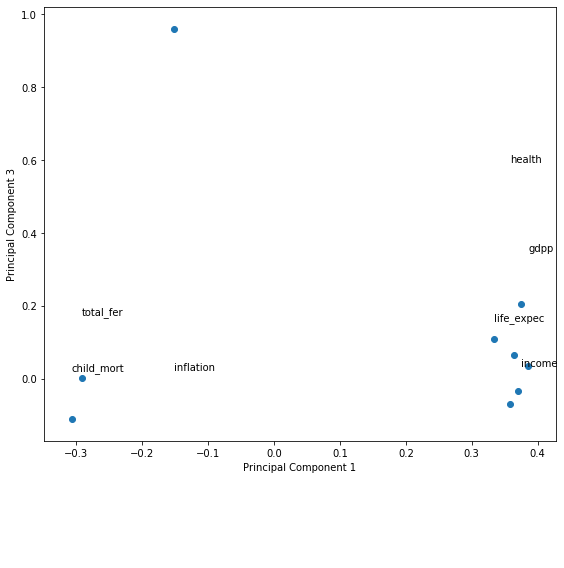

In [269]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC4[i]))
plt.tight_layout()
plt.show()

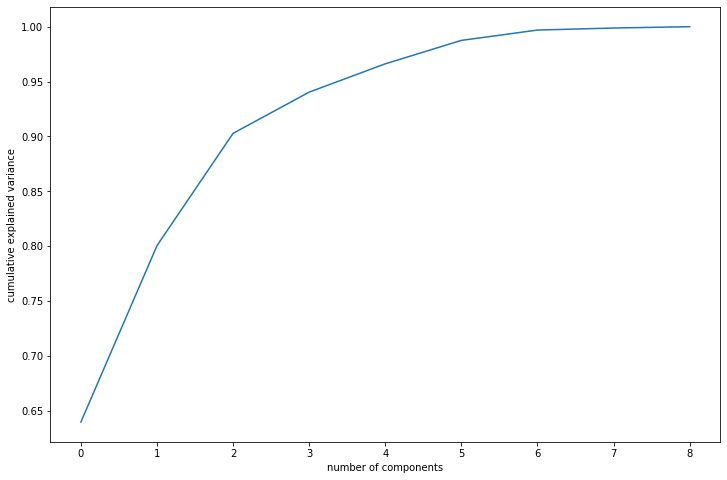

In [270]:

#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [271]:
#Finally let's do dimensionality reduction using the four Principal Components taking 4 components because it has more than 95% variance
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [272]:

df_pca = pca_final.fit_transform(df3)
df_pca.shape

(163, 4)

In [276]:
rownames = list(df1['country'])
pcs_df2 = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})
pcs_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.811468,1.496008,-0.216736,0.198559
1,Albania,-0.114329,-1.559719,-0.308422,-0.041978
2,Algeria,-0.609053,-0.880697,1.208969,0.269774
3,Angola,-2.882560,2.146956,1.478906,0.317971
4,Antigua and Barbuda,0.855810,-0.929867,-0.541156,-0.130173


In [277]:
pc = np.transpose(df_pca)

In [278]:
pcs_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.811468,1.496008,-0.216736,0.198559
1,Albania,-0.114329,-1.559719,-0.308422,-0.041978
2,Algeria,-0.609053,-0.880697,1.208969,0.269774
3,Angola,-2.882560,2.146956,1.478906,0.317971
4,Antigua and Barbuda,0.855810,-0.929867,-0.541156,-0.130173


In [335]:
pc

array([[-2.81146808e+00, -1.14328568e-01, -6.09053422e-01,
        -2.88255998e+00,  8.55809588e-01, -1.01143563e-01,
        -4.81541222e-01,  3.76529886e+00,  4.97864547e+00,
        -5.58154466e-01,  1.99042096e+00,  2.01086573e+00,
        -1.21224757e+00,  1.08554171e+00, -5.71160890e-02,
         5.57694450e+00, -4.26711390e-01, -2.48263062e+00,
        -8.38121872e-01, -1.18138199e+00,  1.93273964e-01,
        -1.13522181e+00,  7.37002079e-02,  3.53490994e+00,
         3.28424831e-01, -2.90849874e+00, -2.96405779e+00,
        -1.32938536e+00, -2.55392952e+00,  4.13001641e+00,
        -5.95192853e-01, -3.35716889e+00, -3.31630444e+00,
         7.56707291e-01, -2.59469162e-01, -1.14342163e-01,
        -2.09809977e+00, -3.36398479e+00, -2.21396539e+00,
         4.01957809e-01, -2.69699340e+00,  1.00101742e+00,
         3.07864290e+00,  2.23968447e+00,  5.74432855e+00,
        -4.50134491e-01, -4.16143620e-01, -9.97805607e-01,
        -4.44554035e-01, -6.24731707e-01, -2.16100347e+0

## Outliers Removal

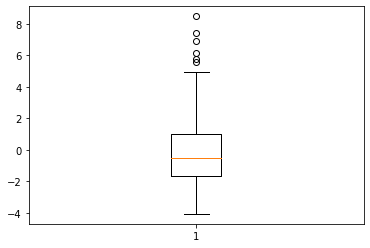

In [279]:

## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df3 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

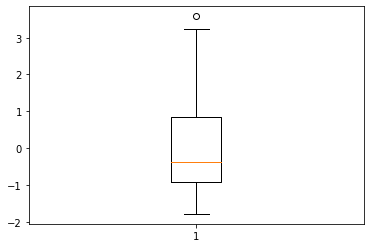

In [280]:

plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df3 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

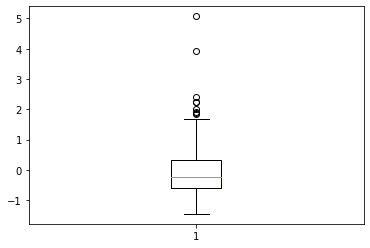

In [281]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df3 = pcs_df2[(pcs_df2.PC3 >= Q1) & (pcs_df2.PC3 <= Q3)]

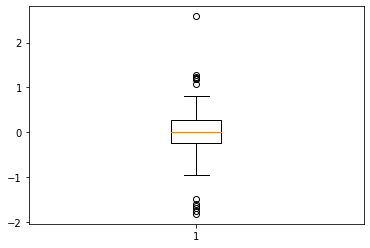

In [282]:
plt.boxplot(pcs_df2.PC4)
Q1 = pcs_df2.PC4.quantile(0.05)
Q3 = pcs_df2.PC4.quantile(0.95)
IQR = Q3 - Q1
pcs_df3 = pcs_df2[(pcs_df2.PC4 >= Q1) & (pcs_df2.PC4 <= Q3)]

In [342]:
#checking relationship between pcs

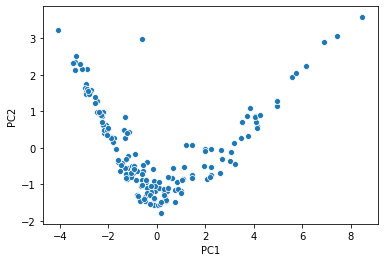

In [283]:
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

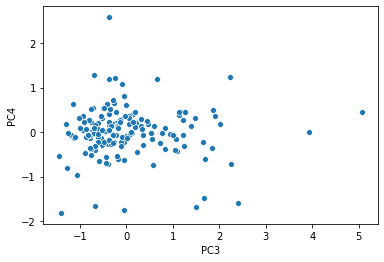

In [284]:
sns.scatterplot(x='PC3',y='PC4',data=pcs_df2)

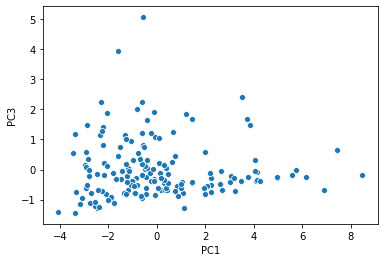

In [285]:
sns.scatterplot(x='PC1',y='PC3',data=pcs_df2)

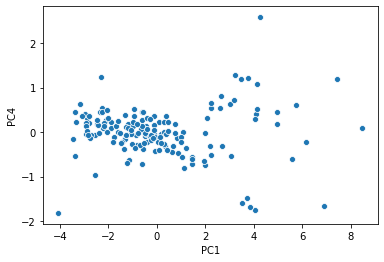

In [286]:
sns.scatterplot(x='PC1',y='PC4',data=pcs_df2)

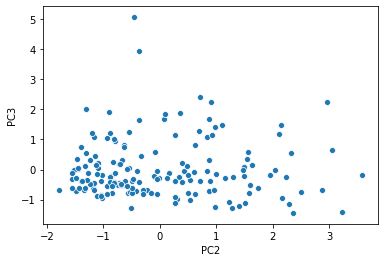

In [287]:
sns.scatterplot(x='PC2',y='PC3',data=pcs_df2)

# Clustering

In [288]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [289]:
pcs_df2.drop(['country'],axis=1)

,PC1,PC2,PC3,PC4
0,-2.811468,1.496008,-0.216736,0.198559
1,-0.114329,-1.559719,-0.308422,-0.041978
2,-0.609053,-0.880697,1.208969,0.269774
3,-2.882560,2.146956,1.478906,0.317971
4,0.855810,-0.929867,-0.541156,-0.130173
...,...,...,...,...
158,-1.263481,-0.291962,-0.828030,-0.070122
159,-0.561158,-0.461264,5.072131,0.452759
160,-0.784577,-1.303702,0.532491,-0.027229
161,-2.069503,0.362520,1.859992,0.495430


In [291]:
hopkins(pcs_df2.drop(['country'],axis=1))

0.8880400580631179

In [292]:
# standardisation .
df4 = pcs_df2
dfs = standard_scaler.fit_transform(df4.drop(['country'],axis=1))

## K-means clustering

In [293]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dfs)
    sse_.append([k, silhouette_score(dfs, kmeans.labels_)])

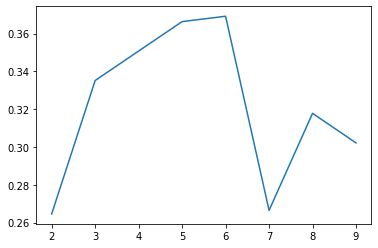

In [294]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [295]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dfs)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dat3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3355273535919576
For n_clusters=3, the silhouette score is 0.359788213305533
For n_clusters=4, the silhouette score is 0.4057727905991972
For n_clusters=5, the silhouette score is 0.38518572881472385
For n_clusters=6, the silhouette score is 0.3712216446429899
For n_clusters=7, the silhouette score is 0.34927186882725125
For n_clusters=8, the silhouette score is 0.2558174780040077


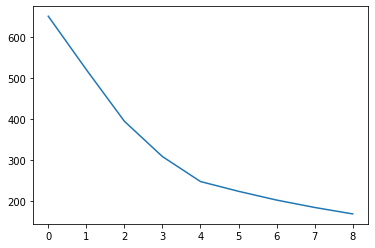

In [296]:
#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dfs)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

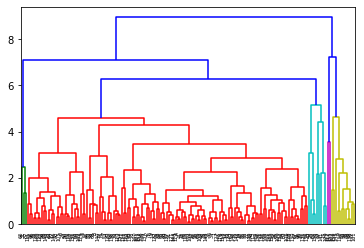

In [298]:
# complete linkage
mergings = linkage(dfs, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [299]:
#Let's perform K means using K=3
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(dfs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Cluster Preparation

In [300]:
dfs1= df4

dfs1.index = pd.RangeIndex(len(dfs1.index))
dat_km = pd.concat([dfs1, pd.Series(model_clus5.labels_)], axis=1)
dat_km.columns = ['country', 'PC1', 'PC2','PC3','PC4','ClusterID']
dat_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.811468,1.496008,-0.216736,0.198559,1
1,Albania,-0.114329,-1.559719,-0.308422,-0.041978,0
2,Algeria,-0.609053,-0.880697,1.208969,0.269774,2
3,Angola,-2.882560,2.146956,1.478906,0.317971,2
4,Antigua and Barbuda,0.855810,-0.929867,-0.541156,-0.130173,0


In [301]:
dat_km['ClusterID'].value_counts()

0    79
1    35
2    24
3    19
4     6
Name: ClusterID, dtype: int64

# cluster analysis visualizations

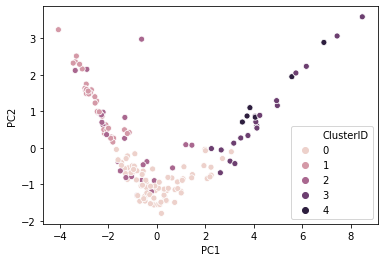

In [343]:
#relationship between clusters' pcs
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

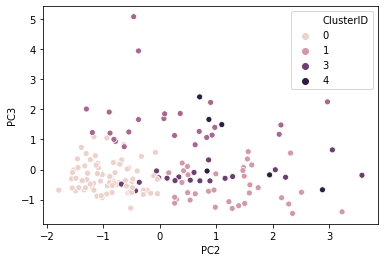

In [304]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',data=dat_km)

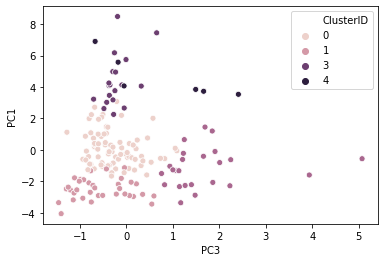

In [305]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',data=dat_km)

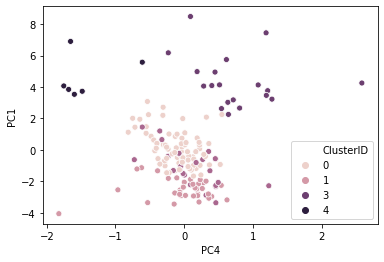

In [336]:
sns.scatterplot(x='PC4',y='PC1',hue='ClusterID',data=dat_km)

In [345]:
#merging data sets
dfnew=pd.merge(df,dat_km, left_index=True,right_index=True)
dfnew.head()


,country_x,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_y,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Afghanistan,-2.811468,1.496008,-0.216736,0.198559,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Albania,-0.114329,-1.559719,-0.308422,-0.041978,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Algeria,-0.609053,-0.880697,1.208969,0.269774,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Angola,-2.882560,2.146956,1.478906,0.317971,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,0.855810,-0.929867,-0.541156,-0.130173,0


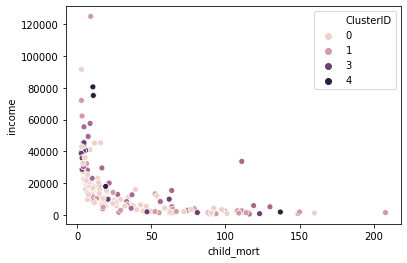

In [338]:
#checking clusters and important variable relationship variables
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=dfnew)

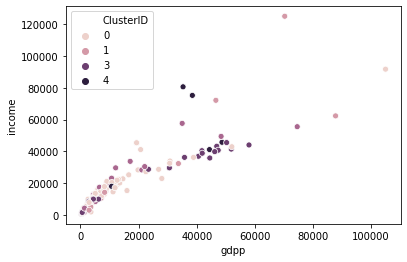

In [340]:
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',data=dfnew)

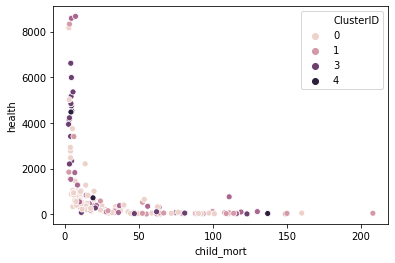

In [341]:
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',data=dfnew)

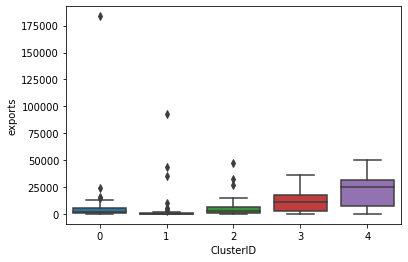

In [309]:
# plot
sns.boxplot(x='ClusterID', y='exports', data=dfnew)

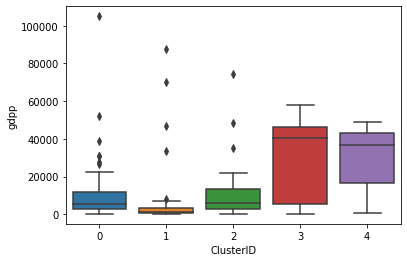

In [310]:
sns.boxplot(x='ClusterID', y='gdpp', data=dfnew)

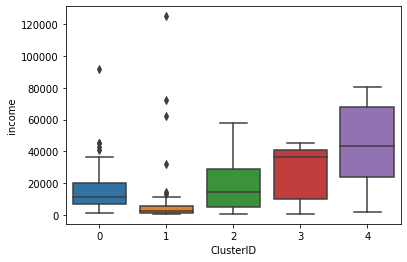

In [311]:
sns.boxplot(x='ClusterID', y='income', data=dfnew)

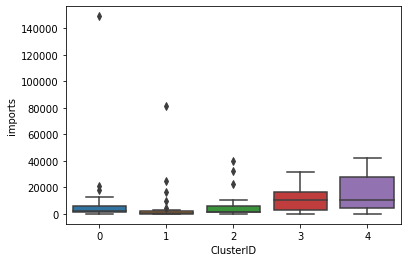

In [312]:
sns.boxplot(x='ClusterID', y='imports', data=dfnew)

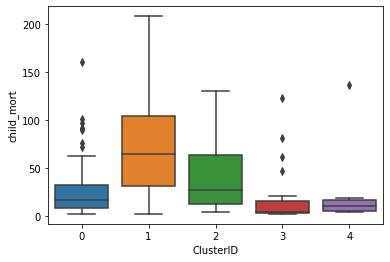

In [313]:
sns.boxplot(x='ClusterID', y='child_mort', data=dfnew)

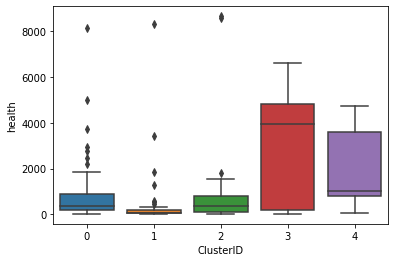

In [314]:
sns.boxplot(x='ClusterID', y='health', data=dfnew)

## hierarchial clustering

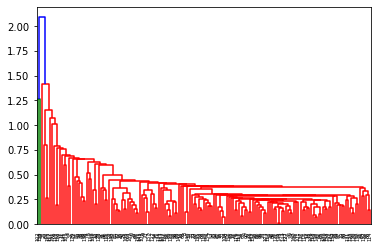

In [315]:
#Let's try hierarchical clustering to see if it works well
#First we'll try the single linkage procedure.
mergings = linkage(dat3_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

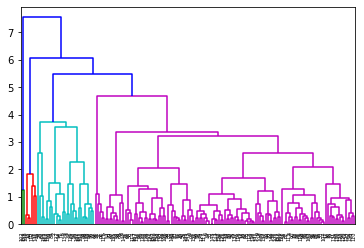

In [316]:
#We don't get good results here.
#Let's try complete linkage method
mergings = linkage(dat3_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [318]:
dfnew[dfnew['ClusterID']==0]['country_x']

1                  Albania
4      Antigua and Barbuda
6                  Armenia
9               Azerbaijan
10                 Bahamas
              ...         
150                   Togo
152                Tunisia
156                Ukraine
158         United Kingdom
160                Uruguay
Name: country_x, Length: 79, dtype: object

In [123]:
dfnew[dfnew['ClusterID']==1]['country_x']

1                  Albania
4      Antigua and Barbuda
6                  Armenia
12              Bangladesh
13                Barbados
              ...         
150                   Togo
152                Tunisia
156                Ukraine
158         United Kingdom
160                Uruguay
Name: country_x, Length: 67, dtype: object

In [319]:
dfnew[dfnew['ClusterID']==2]['country_x']

2                   Algeria
3                    Angola
5                 Argentina
37         Congo, Dem. Rep.
38              Congo, Rep.
49        Equatorial Guinea
55                    Gabon
59                    Ghana
70                Indonesia
71                     Iran
72                     Iraq
79               Kazakhstan
89                    Libya
98                    Malta
102                 Moldova
108                 Namibia
113                 Nigeria
125                  Russia
136         Solomon Islands
138             South Korea
145             Switzerland
157    United Arab Emirates
159           United States
161              Uzbekistan
Name: country_x, dtype: object

In [320]:
dfnew[dfnew['ClusterID']==3]['country_x']

7                           Australia
8                             Austria
29                             Canada
44                            Denmark
53                            Finland
54                             France
58                            Germany
68                            Iceland
74                             Israel
75                              Italy
77                              Japan
109                             Nepal
110                       Netherlands
112                             Niger
135                          Slovenia
140                         Sri Lanka
141    St. Vincent and the Grenadines
154                      Turkmenistan
155                            Uganda
Name: country_x, dtype: object

In [126]:
dfnew[dfnew['ClusterID']==4]['country_x']

2                   Algeria
3                    Angola
5                 Argentina
9                Azerbaijan
14                  Belarus
23                   Brunei
38              Congo, Rep.
49        Equatorial Guinea
55                    Gabon
59                    Ghana
70                Indonesia
71                     Iran
72                     Iraq
79               Kazakhstan
82                   Kuwait
89                    Libya
98                    Malta
102                 Moldova
108                 Namibia
113                 Nigeria
122                Portugal
125                  Russia
136         Solomon Islands
138             South Korea
145             Switzerland
153                  Turkey
157    United Arab Emirates
159           United States
161              Uzbekistan
Name: country_x, dtype: object

In [346]:
#calculating median for setting limits
clu_gdpp = pd.DataFrame(dfnew.groupby(["ClusterID"]).gdpp.median())
clu_child_mort=pd.DataFrame(dfnew.groupby(["ClusterID"]).child_mort.median())
clu_income =pd.DataFrame(dfnew.groupby(["ClusterID"]).income.median())

In [322]:
dfa = pd.concat([pd.Series([0,1,2,3,4]),clu_gdpp,clu_child_mort,clu_income], axis=1)
dfa.columns = ["ClusterID","GDPP","child_mort","income"]
dfa

,ClusterID,GDPP,child_mort,income
0,0,5410,16.60,11100
1,1,988,64.40,2180
2,2,5860,27.70,14150
3,3,40600,4.50,36200
4,4,36900,10.65,43400


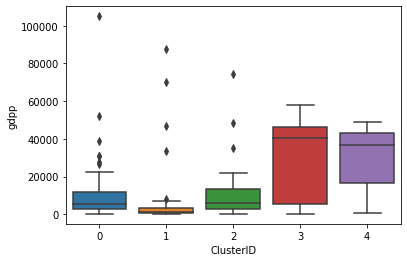

In [323]:
sns.boxplot(x='ClusterID', y='gdpp', data=dfnew)

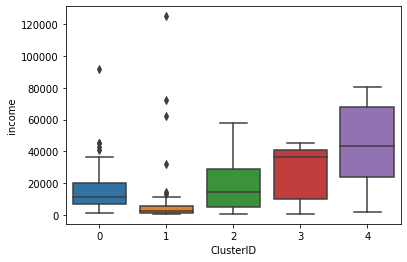

In [324]:
sns.boxplot(x='ClusterID', y='income', data=dfnew)

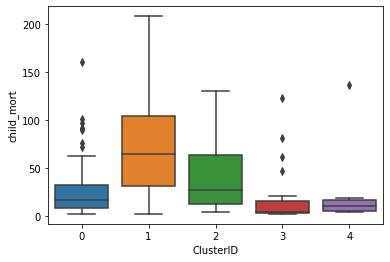

In [325]:
sns.boxplot(x='ClusterID', y='child_mort', data=dfnew)

cluster 0 and 1 requires more help than other clusters 

In [326]:
dfa = pd.concat([pd.Series([0,1,2,3,4]),clu_gdpp,clu_child_mort,clu_income], axis=1)
dfa.columns = ["ClusterID","GDPP","child_mort","income"]
dfa

,ClusterID,GDPP,child_mort,income
0,0,5410,16.60,11100
1,1,988,64.40,2180
2,2,5860,27.70,14150
3,3,40600,4.50,36200
4,4,36900,10.65,43400


## creating final list using binning

In [327]:
#From clustering analysis we observed the upper limits for gdpp and income
#and lower limits for child_mort
#using binning
final=dfnew[dfnew['gdpp']<=988]
final=final[final['child_mort']>= 65]
final=final[final['income']<= 2180]

In [328]:
final


,country_x,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_y,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,Afghanistan,-2.811468,1.496008,-0.216736,0.198559,1
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,Benin,-2.482631,1.284057,-1.291174,0.180348,1
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,Burkina Faso,-2.908499,1.743159,-0.602777,0.196099,1
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,Burundi,-2.964058,1.629765,0.151268,0.400870,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,Central African Republic,-3.357169,2.351553,-1.458389,-0.531383,1
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,Chad,-3.316304,2.509857,-0.754819,0.215684,1
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,Comoros,-2.098100,0.629389,-0.806303,0.276198,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,"Congo, Dem. Rep.",-3.363985,2.116005,1.169305,0.460976,2
56,Gambia,80.3,133.7560,31.9778,239.974,1660,4.300,65.5,5.71,562,Gambia,-2.254731,0.865633,-0.720009,0.539244,1
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.100,58.0,5.34,648,Guinea,-2.932145,1.567393,0.592412,0.135923,1


In [329]:
The_list=final['country_x'].tolist()

In [347]:
#The final list of countries which are in need of aid immediately
The_list

['Afghanistan',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Gambia',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Liberia',
 'Malawi',
 'Mali',
 'Mozambique',
 'Niger',
 'Sierra Leone',
 'Tanzania',
 'Togo',
 'Uganda']